# BigMart Project: Data Exploration and Planning Questions

## Carry out and present the results of your previously planned data exploration.

In [1]:
library(tidyverse)
library(skimr)
library(RColorBrewer)
library(RcppRoll)
library(tidymodels)

Warning message:
"package 'tidyverse' was built under R version 4.3.2"
Warning message:
"package 'ggplot2' was built under R version 4.3.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'RcppRoll' was built under R version 4.3.2"
── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.2

In [2]:
# Loading the data
df_url = "data/BigMart data.csv"


df = read_csv(df_url)


# Preview the data
head(df)

Rows: 8523 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Ou...
dbl (5): Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
FDA15,9.300,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,NA,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.00000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.00000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


#### Step 1: Checking for duplicates

In [3]:
# Previewing the unique records in the dataset
glimpse(distinct(df))

Rows: 8,523
Columns: 12
$ Item_Identifier           <chr> "FDA15", "DRC01", "FDN15", "FDX07", "NCD19",…
$ Item_Weight               <dbl> 9.300, 5.920, 17.500, 19.200, 8.930, 10.395,…
$ Item_Fat_Content          <chr> "Low Fat", "Regular", "Low Fat", "Regular", …
$ Item_Visibility           <dbl> 0.016047301, 0.019278216, 0.016760075, 0.000…
$ Item_Type                 <chr> "Dairy", "Soft Drinks", "Meat", "Fruits and …
$ Item_MRP                  <dbl> 249.8092, 48.2692, 141.6180, 182.0950, 53.86…
$ Outlet_Identifier         <chr> "OUT049", "OUT018", "OUT049", "OUT010", "OUT…
$ Outlet_Establishment_Year <dbl> 1999, 2009, 1999, 1998, 1987, 2009, 1987, 19…
$ Outlet_Size               <chr> "Medium", "Medium", "Medium", NA, "High", "M…
$ Outlet_Location_Type      <chr> "Tier 1", "Tier 3", "Tier 1", "Tier 3", "Tie…
$ Outlet_Type               <chr> "Supermarket Type1", "Supermarket Type2", "S…
$ Item_Outlet_Sales         <dbl> 3735.1380, 443.4228, 2097.2700, 732.3800, 99…


> From the above there are no duplicate records in the dataset. The dataset contains 8523 unique records.

### Checking for Missing Values

In [4]:
summary(df)

 Item_Identifier     Item_Weight     Item_Fat_Content   Item_Visibility  
 Length:8523        Min.   : 4.555   Length:8523        Min.   :0.00000  
 Class :character   1st Qu.: 8.774   Class :character   1st Qu.:0.02699  
 Mode  :character   Median :12.600   Mode  :character   Median :0.05393  
                    Mean   :12.858                      Mean   :0.06613  
                    3rd Qu.:16.850                      3rd Qu.:0.09459  
                    Max.   :21.350                      Max.   :0.32839  
                    NA's   :1463                                         
  Item_Type            Item_MRP      Outlet_Identifier 
 Length:8523        Min.   : 31.29   Length:8523       
 Class :character   1st Qu.: 93.83   Class :character  
 Mode  :character   Median :143.01   Mode  :character  
                    Mean   :140.99                     
                    3rd Qu.:185.64                     
                    Max.   :266.89                     
                

In [5]:
# How many records are missing?
colSums(is.na(df))

Item_Identifier               Item_Weight          Item_Fat_Content 
                        0                      1463                         0 
          Item_Visibility                 Item_Type                  Item_MRP 
                        0                         0                         0 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                        0                         0                      2410 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                        0                         0                         0

> From the above there are **1463** values missing from the **Item_Weight** field and **2410** values missing from the **Outlet_Size** field

In [6]:
# Looks like outlet location gives us a good signal for outlet size
df |>
    summarise(.by=c(Outlet_Establishment_Year, Outlet_Identifier, ), null_count= sum(is.na(Item_Weight)) ) |>
    arrange(Outlet_Establishment_Year)

Outlet_Establishment_Year,Outlet_Identifier,null_count
<dbl>,<chr>,<int>
1985,OUT027,935
1985,OUT019,528
1987,OUT013,0
1997,OUT046,0
1998,OUT010,0
1999,OUT049,0
2002,OUT045,0
2004,OUT035,0
2007,OUT017,0


In [7]:
# Looks like outlet location gives us a good signal for outlet size
df |>
    filter(Item_MRP >= 266.8)

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
FDS13,6.465,Low Fat,0.1252104,Canned,266.8884,OUT017,2007,NA,Tier 2,Supermarket Type1,1059.954
FDR25,17.000,Regular,0.1395219,Canned,266.8884,OUT046,1997,Small,Tier 1,Supermarket Type1,5034.780


In [8]:
# Items contributing the most to sales

total_sales <- sum(df$Item_Outlet_Sales)

df |>
    mutate(sales_contribution=(Item_Outlet_Sales/total_sales)) |>
    arrange(desc(sales_contribution)) |>
    mutate(rolling_sum = cumsum(sales_contribution)) |>
    slice_max(sales_contribution, n = 10)

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,sales_contribution,rolling_sum
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
NCE42,NA,Low Fat,0.01055095,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.965,0.0007039361,0.0007039361
FDQ19,NA,Regular,0.01429556,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.560,0.0006517927,0.0013557288
FDZ20,NA,Low Fat,0.00000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.102,0.0006156218,0.0019713506
FDP33,NA,Low Fat,0.08883995,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.690,0.0005913407,0.0025626914
FDI50,NA,Regular,0.03069331,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.584,0.0005543819,0.0031170733
FDF39,14.850,Regular,0.01949505,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.649,0.0005516960,0.0036687693
FDU14,NA,Low Fat,0.03458436,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.675,0.0005506216,0.0042193908
NCH18,NA,Low Fat,0.04444496,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.888,0.0005418116,0.0047612025
NCM05,6.825,Low Fat,0.05984697,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.936,0.0005260540,0.0052872565


In [9]:
# Previewing the Missing values

df |>
    # Filter the df for only missing records
    filter(is.na(Outlet_Size) | is.na(Item_Weight))

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
FDX07,19.200,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,NA,Tier 3,Grocery Store,732.3800
FDP10,NA,Low Fat,0.12746986,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.200,Regular,0.01668711,Frozen Foods,96.9726,OUT045,2002,NA,Tier 2,Supermarket Type1,1076.5986
FDU28,19.200,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,NA,Tier 2,Supermarket Type1,4710.5350
DRI11,NA,Low Fat,0.03423768,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
FDW12,NA,Regular,0.03539992,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
FDC37,NA,Low Fat,0.05755700,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
NCD06,13.000,Low Fat,0.09988710,Household,45.9060,OUT017,2007,NA,Tier 2,Supermarket Type1,838.9080
FDE51,5.925,Regular,0.16146653,Dairy,45.5086,OUT010,1998,NA,Tier 3,Grocery Store,178.4344


### Univariate Analysis of Columns

> The dataset consists of **5** numeric variables and **7** categorical variables.

In [10]:
# Previewing Item Weight
df |>
    # Select the Item_Weight Col
    select(Item_Weight) |>
    summarise(avg=mean(Item_Weight, na.rm = TRUE), 
              std_dev=sd(Item_Weight, na.rm=TRUE), 
              median=median(Item_Weight, na.rm=TRUE),
              qtile_25 = quantile(Item_Weight, probs=0.25, na.rm=TRUE),
              qtile_75 = quantile(Item_Weight, probs=0.75, na.rm=TRUE),
              iqr = IQR(Item_Weight, na.rm=TRUE),
              min = min(Item_Weight, na.rm=TRUE),
              max = max(Item_Weight, na.rm=TRUE),
              non_missing_rows = NROW(Item_Weight[!is.na(Item_Weight)])
             )

avg,std_dev,median,qtile_25,qtile_75,iqr,min,max,non_missing_rows
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
12.85765,4.643456,12.6,8.77375,16.85,8.07625,4.555,21.35,7060


Warning message:
"Removed 1463 rows containing non-finite values (`stat_bin()`)."


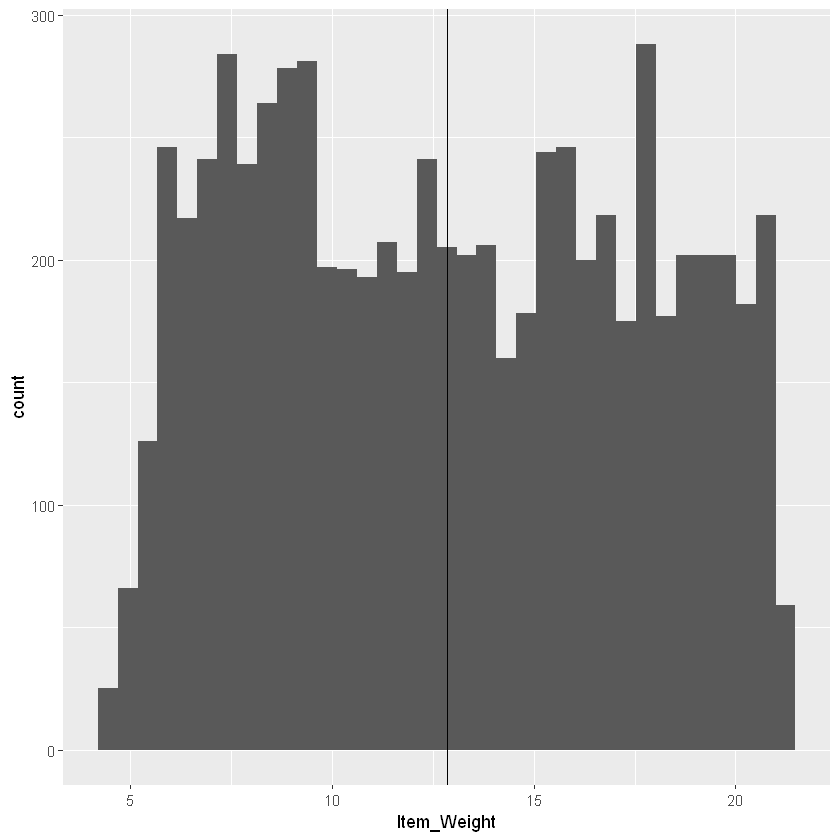

In [11]:
# Previewing Item Weight
df |>
    # Select the Item_Weight Col
    select(Item_Weight) |>
ggplot( 
    aes(x = Item_Weight)) +
geom_histogram(bins = 35) +
geom_vline(xintercept=mean(df$Item_Weight, na.rm = TRUE))

> This histogram shows a fairly uniformly distributed Item-Weight.

In [12]:
# Previewing Item_Visibility
df |>
    # Select the Item_Weight Col
    select(Item_Visibility) |>
    summarise(avg=mean(Item_Visibility, na.rm = TRUE), 
              std_dev=sd(Item_Visibility, na.rm=TRUE), 
              median=median(Item_Visibility, na.rm=TRUE),
              qtile_25 = quantile(Item_Visibility, probs=0.25, na.rm=TRUE),
              qtile_75 = quantile(Item_Visibility, probs=0.75, na.rm=TRUE),
              iqr = IQR(Item_Visibility, na.rm=TRUE),
              min = min(Item_Visibility, na.rm=TRUE),
              max = max(Item_Visibility, na.rm=TRUE),
              non_missing_rows = NROW(Item_Visibility[!is.na(Item_Visibility)])
             )

avg,std_dev,median,qtile_25,qtile_75,iqr,min,max,non_missing_rows
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.06613203,0.05159782,0.05393093,0.02698948,0.09458529,0.06759582,0,0.3283909,8523


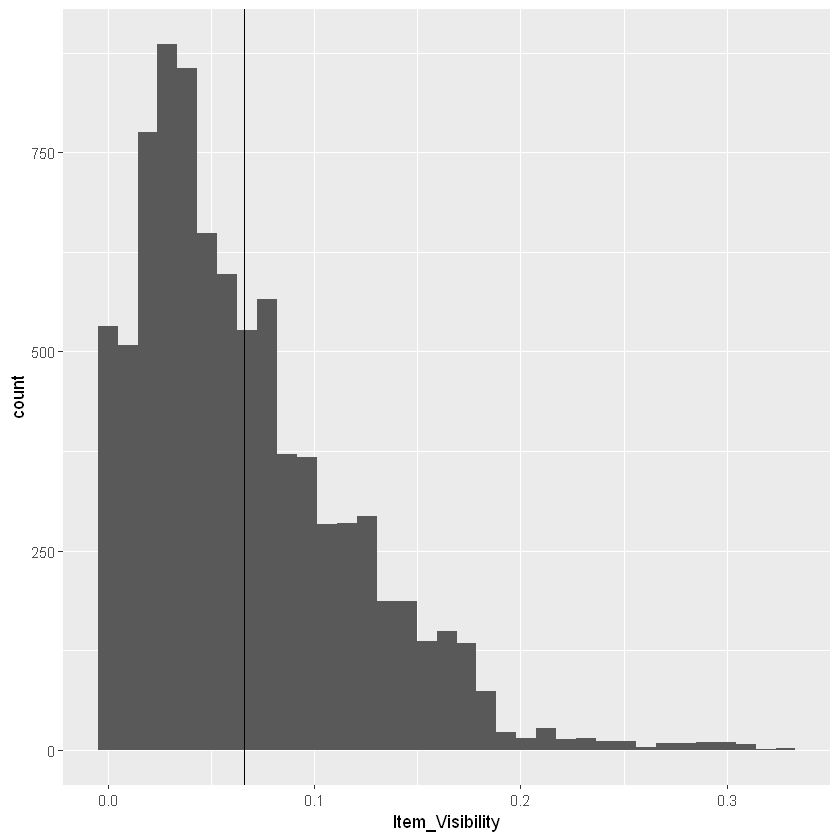

In [13]:
# Previewing Item_Visibility
df |>
    # Select the Item_Visibility Col
    select(Item_Visibility) |>
ggplot( 
    aes(x = Item_Visibility)) +
geom_histogram(bins = 35) +
geom_vline(xintercept=mean(df$Item_Visibility, na.rm = TRUE))

> The histogram shows a positively skewed distribution where most records are between 0.0 and 0.2.

In [14]:
# Previewing Item_MRP
df |>
    # Select the Item_Weight Col
    select(Item_MRP) |>
    summarise(avg=mean(Item_MRP, na.rm = TRUE), 
              std_dev=sd(Item_MRP, na.rm=TRUE), 
              median=median(Item_MRP, na.rm=TRUE),
              qtile_25 = quantile(Item_MRP, probs=0.25, na.rm=TRUE),
              qtile_75 = quantile(Item_MRP, probs=0.75, na.rm=TRUE),              
              iqr = IQR(Item_MRP, na.rm=TRUE),
              min = min(Item_MRP, na.rm=TRUE),
              max = max(Item_MRP, na.rm=TRUE),
              non_missing_rows = NROW(Item_MRP[!is.na(Item_MRP)])
             )

avg,std_dev,median,qtile_25,qtile_75,iqr,min,max,non_missing_rows
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
140.9928,62.27507,143.0128,93.8265,185.6437,91.8172,31.29,266.8884,8523


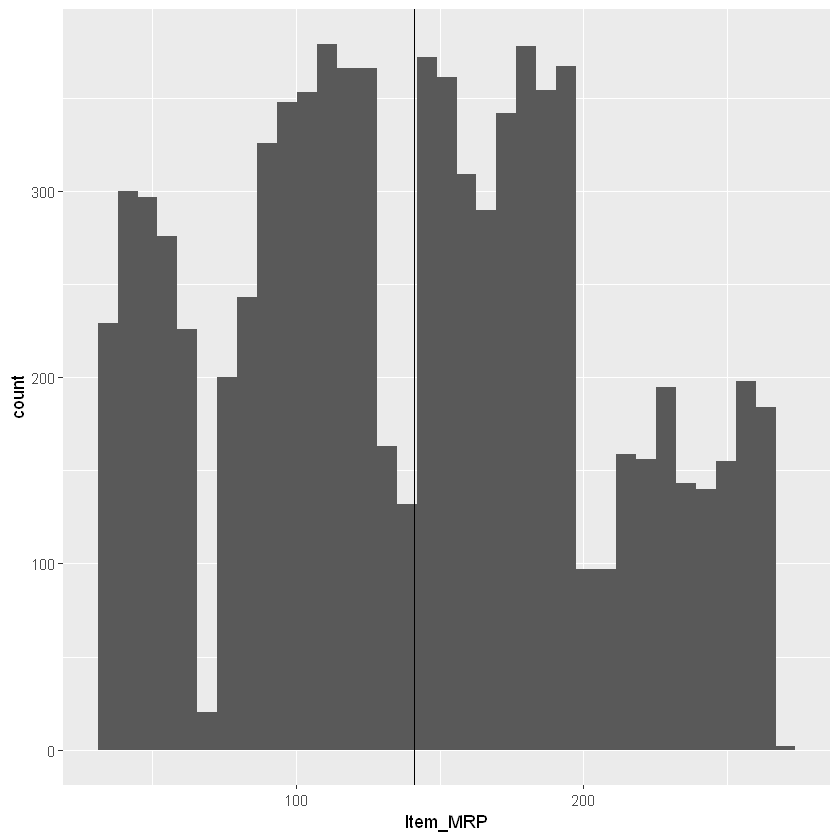

In [15]:
# Previewing Item_MRP
df |>
    # Select the Item_MRP Col
    select(Item_MRP) |>
ggplot( 
    aes(x = Item_MRP)) +
geom_histogram(bins = 35) +
geom_vline(xintercept=mean(df$Item_MRP, na.rm = TRUE))

> Above distribution is bi-modal with most MRP occuring arround 100 and 175. 

In [16]:
# Previewing Item_Outlet_Sales
df |>
    # Select the Item_Weight Col
    select(Item_Outlet_Sales) |>
    summarise(avg=mean(Item_Outlet_Sales, na.rm = TRUE), 
              std_dev=sd(Item_Outlet_Sales, na.rm=TRUE), 
              median=median(Item_Outlet_Sales, na.rm=TRUE),
              qtile_25 = quantile(Item_Outlet_Sales, probs=0.25, na.rm=TRUE),
              qtile_75 = quantile(Item_Outlet_Sales, probs=0.75, na.rm=TRUE),
              iqr = IQR(Item_Outlet_Sales, na.rm=TRUE),
              min = min(Item_Outlet_Sales, na.rm=TRUE),
              max = max(Item_Outlet_Sales, na.rm=TRUE),
              non_missing_rows = NROW(Item_Outlet_Sales[!is.na(Item_Outlet_Sales)])
             )

avg,std_dev,median,qtile_25,qtile_75,iqr,min,max,non_missing_rows
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2181.289,1706.5,1794.331,834.2474,3101.296,2267.049,33.29,13086.96,8523


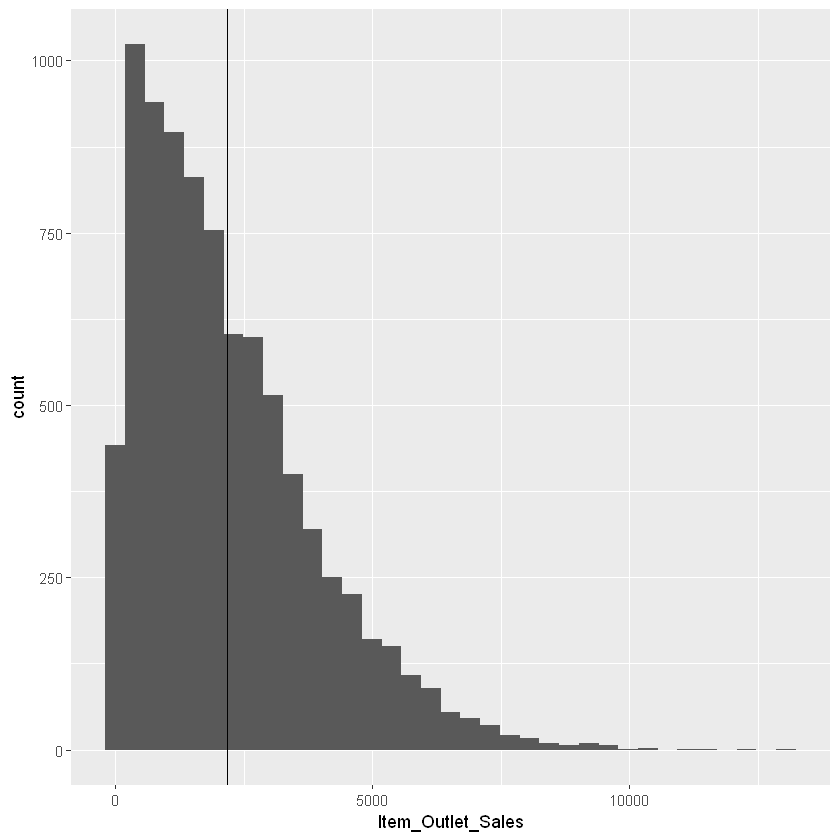

In [17]:
# Previewing Item_Outlet_Sales
df |>
    # Select the Item_Outlet_Sales Col
    select(Item_Outlet_Sales) |>
ggplot( 
    aes(x = Item_Outlet_Sales)) +
geom_histogram(bins = 35) +
geom_vline(xintercept=mean(df$Item_Outlet_Sales, na.rm = TRUE))

> The above histogram shows that majority of the values lie between 0-7500.

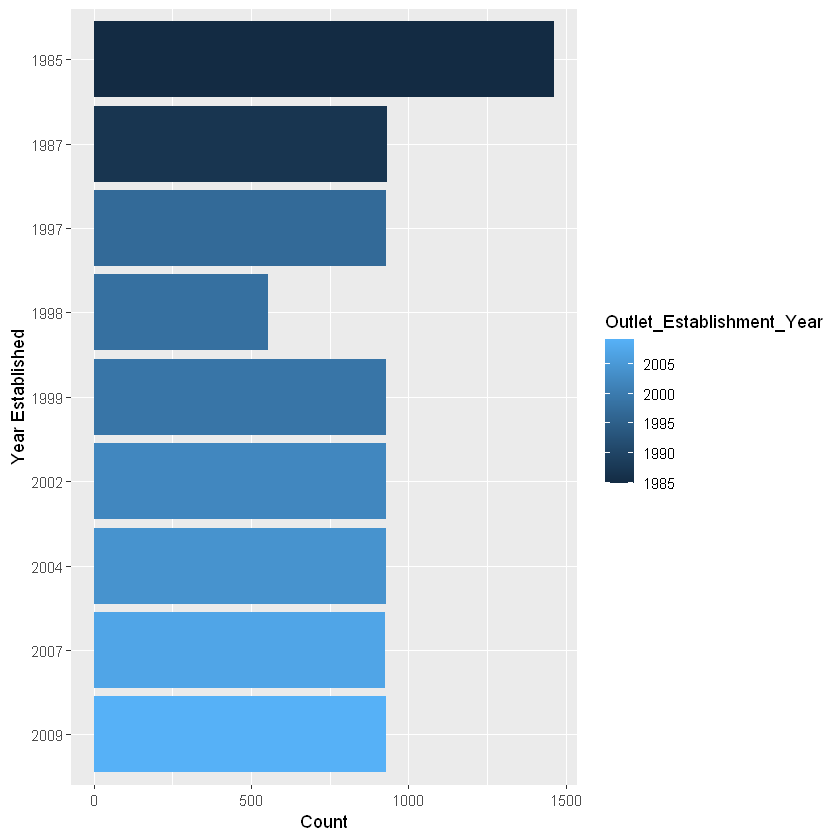

In [18]:
# Analyzing the Outlet_Establishment_Year
df |>
    select(Outlet_Establishment_Year) |>
    summarise(.by=Outlet_Establishment_Year, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Establishment_Year, -Outlet_Establishment_Year), y=count, fill=Outlet_Establishment_Year)
) +
geom_col() + 
xlab("Year Established") +
ylab("Count") +
coord_flip()

> The chart above shows that most outlets were established in 1985. Less outlets were established in 1998 but since then a study number of outlets has been established till 2009.

### Analyzing the Categorical Variables

In [19]:
# Analyzing the Item_Identifier
df |>
    select(Item_Identifier) |>
    summarise(.by=Item_Identifier, count=n()) #|>
    # Select the top 10
    # slice_max(count, n=10) |>
# ggplot(
#     aes(x=reorder(Item_Identifier, count), y=count)
# ) +
# geom_col() + 
# coord_flip()

Item_Identifier,count
<chr>,<int>
FDA15,8
DRC01,6
FDN15,7
FDX07,6
NCD19,6
FDP36,3
FDO10,8
FDP10,7
FDH17,7


> From the above, there aren't enough records for each group to use this filed in my predictive model. This is because each subgroup has at most 10 records. Some prediction algorithms run into errors when a subgroup has a low number of observations. I will test this is my predictive model and provide feedback.

In [20]:
# Analyzing the Item_Fat_Content
df |>
    select(Item_Fat_Content) |>
    summarise(.by=Item_Fat_Content, count=n()) #|>

Item_Fat_Content,count
<chr>,<int>
Low Fat,5089
Regular,2889
low fat,112
LF,316
reg,117


> From the above, the **Low Fat** records are represented differently, and this has to be cleaned. **Low Fat** is represented as **low fat** and **LF**. And also, replace **reg** with **Regular**

In [21]:
# Fixing the Item_Fat_Content
df <- df |>
    # Fix the Item_Fat_Content Col
    mutate(Item_Fat_Content = case_when(
                                      # low fat
                                      Item_Fat_Content == "low fat" ~ "Low Fat",
                                      # LF
                                      Item_Fat_Content == "LF" ~ "Low Fat",
                                      # reg
                                      Item_Fat_Content == "reg"  ~ "Regular",
                                      # Else
                                      TRUE ~ Item_Fat_Content
    ))

df |>
    select(Item_Fat_Content) |>
    summarise(.by=Item_Fat_Content, count=n())

Item_Fat_Content,count
<chr>,<int>
Low Fat,5517
Regular,3006


> With the new errors fixed, now we have 5517 records for Low Fat and 3006 records for Regular.

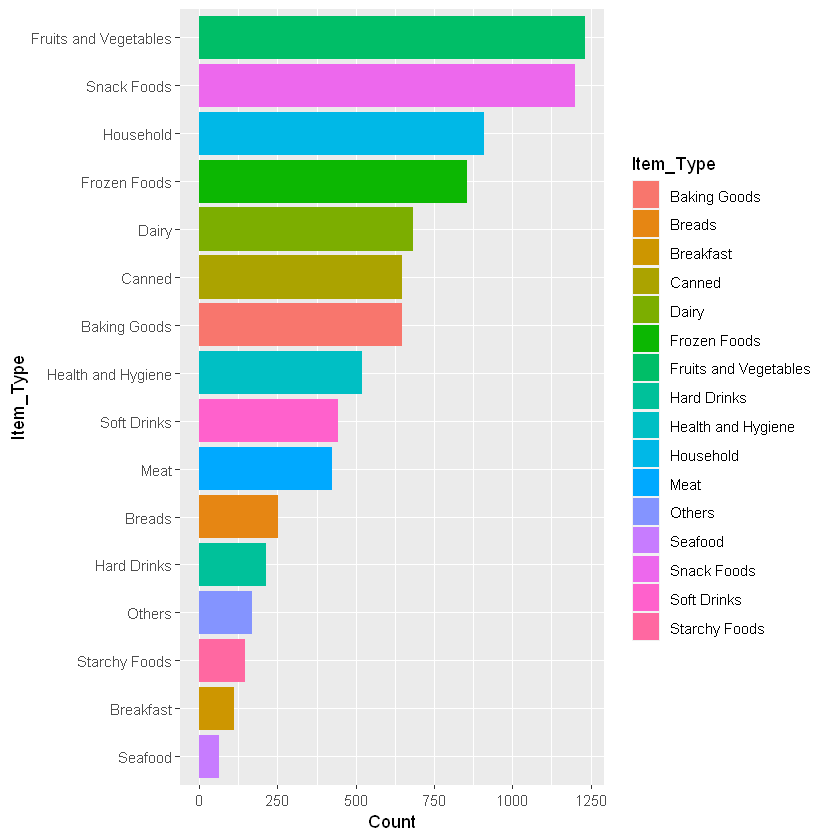

In [22]:
# Analyzing the Item_Type
df |>
    select(Item_Type) |>
    summarise(.by=Item_Type, count=n()) |>
ggplot(
    aes(x=reorder(Item_Type, count), y=count, fill=Item_Type)
) +
geom_col() + 
coord_flip() + 
ylab("Count") +
xlab("Item_Type")

> From the data, most sales happen with the Fruits and Vegetables items.

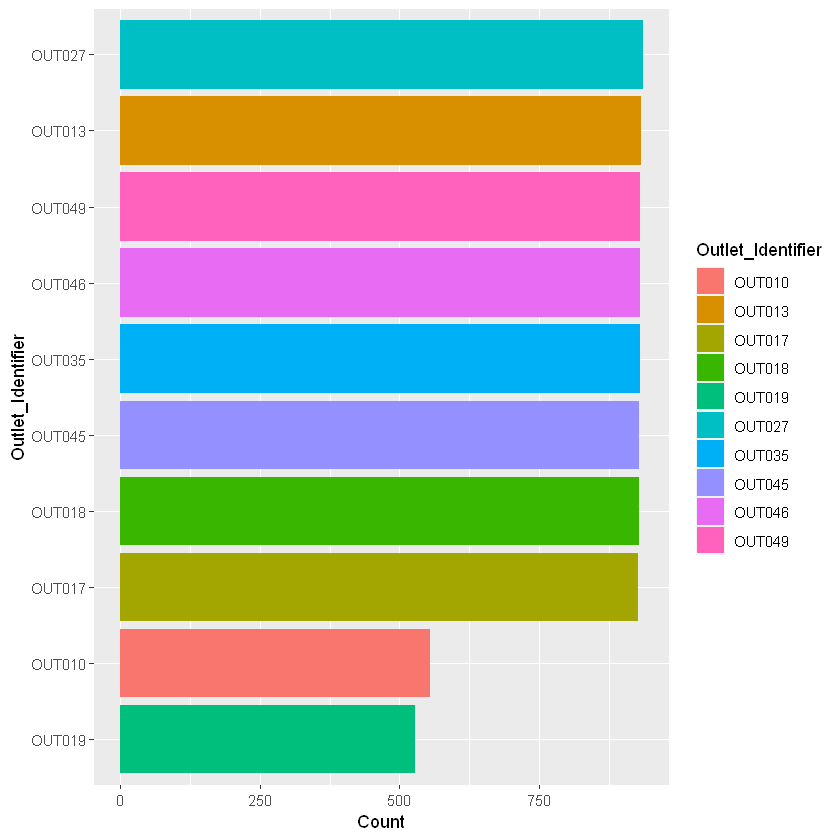

In [23]:
# Analyzing the Outlet_Identifier
df |>
    select(Outlet_Identifier) |>
    summarise(.by=Outlet_Identifier, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Identifier, count), y=count, fill=Outlet_Identifier)
) +
geom_col() + 
coord_flip() + 
xlab("Outlet_Identifier") +
ylab("Count")

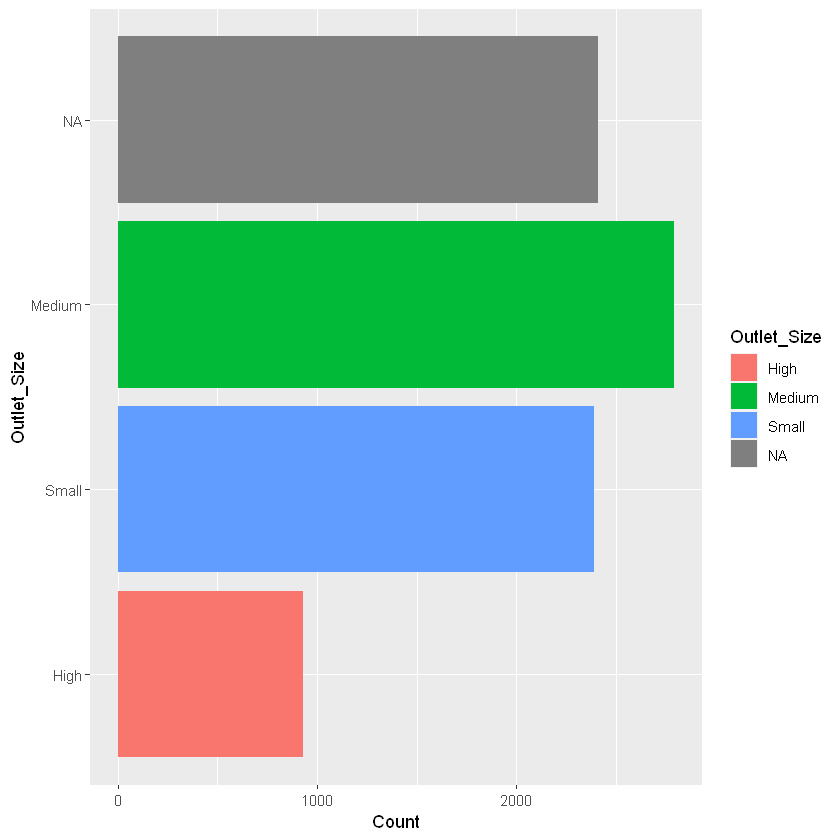

In [24]:
# Analyzing the Outlet_Size
df |>
    select(Outlet_Size) |>
    summarise(.by=Outlet_Size, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Size, count), y=count, fill=Outlet_Size)
) +
geom_col() + 
coord_flip() + 
xlab("Outlet_Size") +
ylab("Count")

> From the above, most outlets are medium in size. I will have to check if the missing values here are missing completely at random or are missing at random.

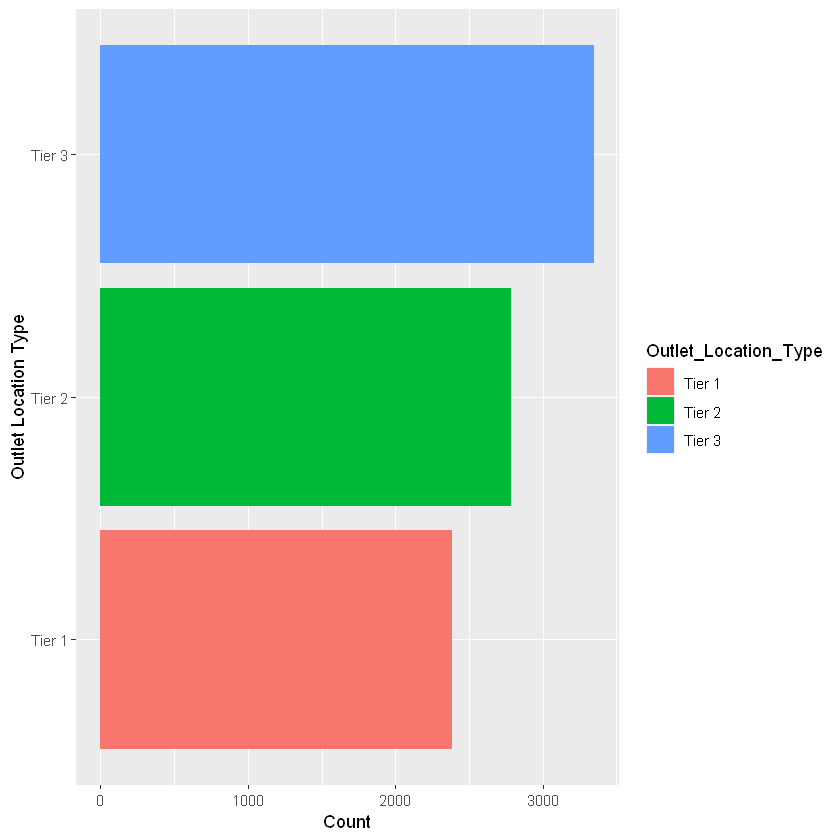

In [25]:
# Analyzing the Outlet_Location_Type
df |>
    select(Outlet_Location_Type) |>
    summarise(.by=Outlet_Location_Type, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Location_Type, count), y=count, fill=Outlet_Location_Type)
) +
geom_col() + 
xlab("Outlet Location Type") +
ylab("Count") +
coord_flip()

> The location type is dominated by Tier 3.

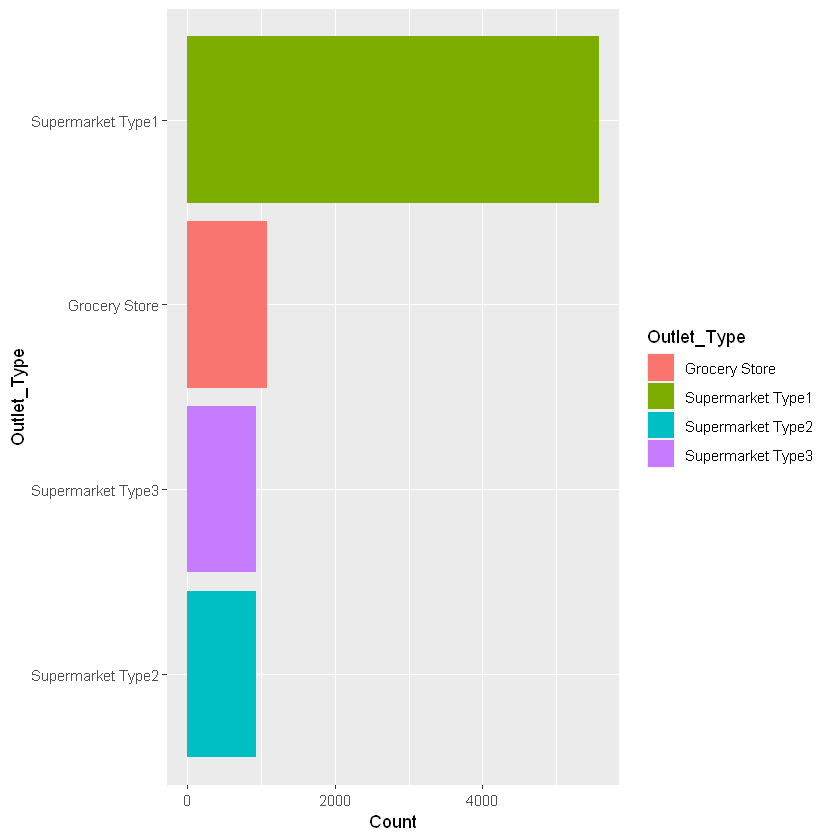

In [26]:
# Analyzing the Outlet_Type
df |>
    select(Outlet_Type) |>
    summarise(.by=Outlet_Type, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Type, count), y=count, fill=Outlet_Type)
) +
geom_col() + 
coord_flip()  + 
xlab("Outlet_Type") +
ylab("Count")

> In this dataset, outlet type is dominated by supermarkets Type 1.

### Bivariate Analysis

In [27]:
library(GGally)

Warning message:
"package 'GGally' was built under R version 4.3.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [28]:
cor(df[, c("Item_Outlet_Sales", "Item_Visibility", "Item_Weight", "Item_MRP")], use = "complete.obs")

,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_MRP
Item_Outlet_Sales,1.00000000,-0.085334041,0.01412274,0.620961316
Item_Visibility,-0.08533404,1.000000000,-0.01404773,-0.006061148
Item_Weight,0.01412274,-0.014047726,1.00000000,0.027141154
Item_MRP,0.62096132,-0.006061148,0.02714115,1.000000000


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1463 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1463 rows containing missing values"
Warning message:
"Removed 1463 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1463 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1463 rows containing non-finite values (`stat_density()`)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1463 rows containing missing values"
Warning message:
"Removed 1463 rows containing missing values (`geom_point()`)."


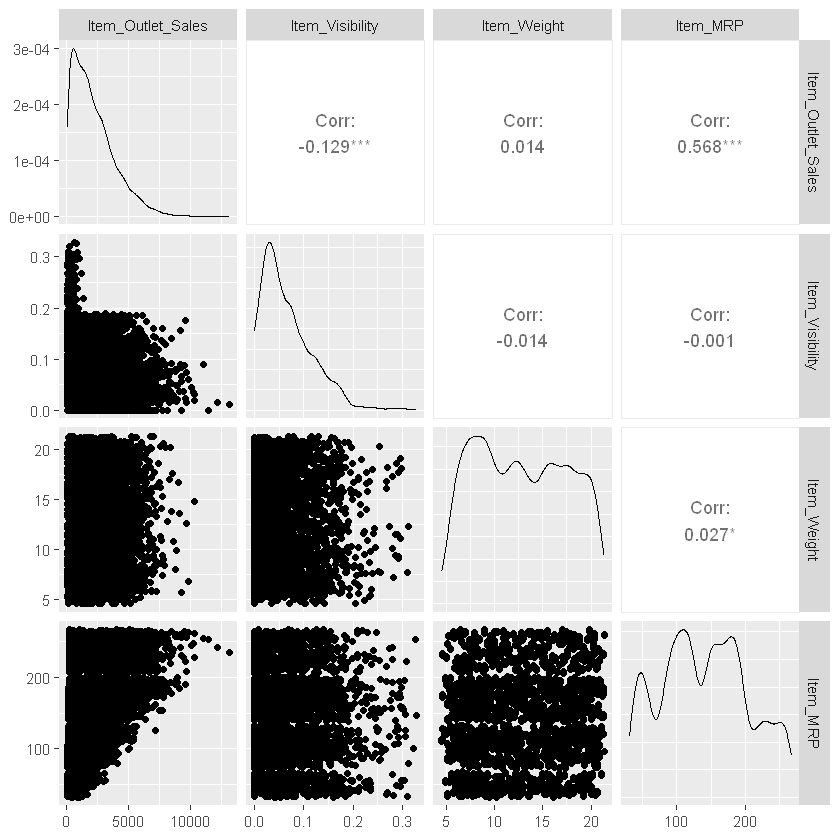

In [29]:
ggpairs(
    df[, c("Item_Outlet_Sales", "Item_Visibility", "Item_Weight", "Item_MRP")],
)

> No clear linear relationships exists b/n **Item Outlet sales** and **Item_Visibility**, **Item_Weight**. A clearly linear relationship exists between **Item_Sales_Outlet** and **Item_MRP**.

In [30]:
corr_df <- df |>
                select(c(Item_Weight, Item_Fat_Content)) |>
                mutate(Item_Fat_Content = if_else(Item_Fat_Content == "Low Fat", 0, 1))

In [31]:
# Point bi-serial correlation between Item Weight and Item Fat
cor.test(x = corr_df$Item_Weight, y =  corr_df$Item_Fat_Content)


	Pearson's product-moment correlation

data:  corr_df$Item_Weight and corr_df$Item_Fat_Content
t = -1.9528, df = 7058, p-value = 0.05088
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -4.653966e-02  8.919433e-05
sample estimates:
        cor 
-0.02323787 


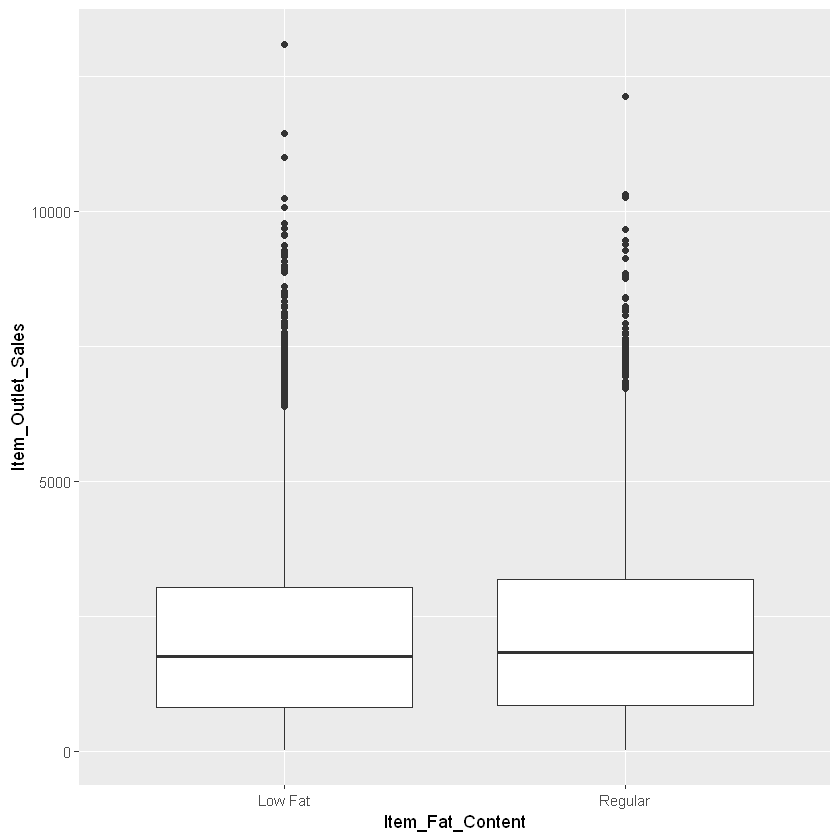

In [32]:
# Determining the relationship b/n Item_Outlet_Sales and Item_Fat_Content

df |>
ggplot(
    aes(y=Item_Outlet_Sales, 
        x=reorder(Item_Fat_Content, Item_Outlet_Sales))
) +
geom_boxplot() + 
xlab("Item_Fat_Content") +
ylab("Item_Outlet_Sales")

> From the above it looks like the regular item fat content leads to more sales

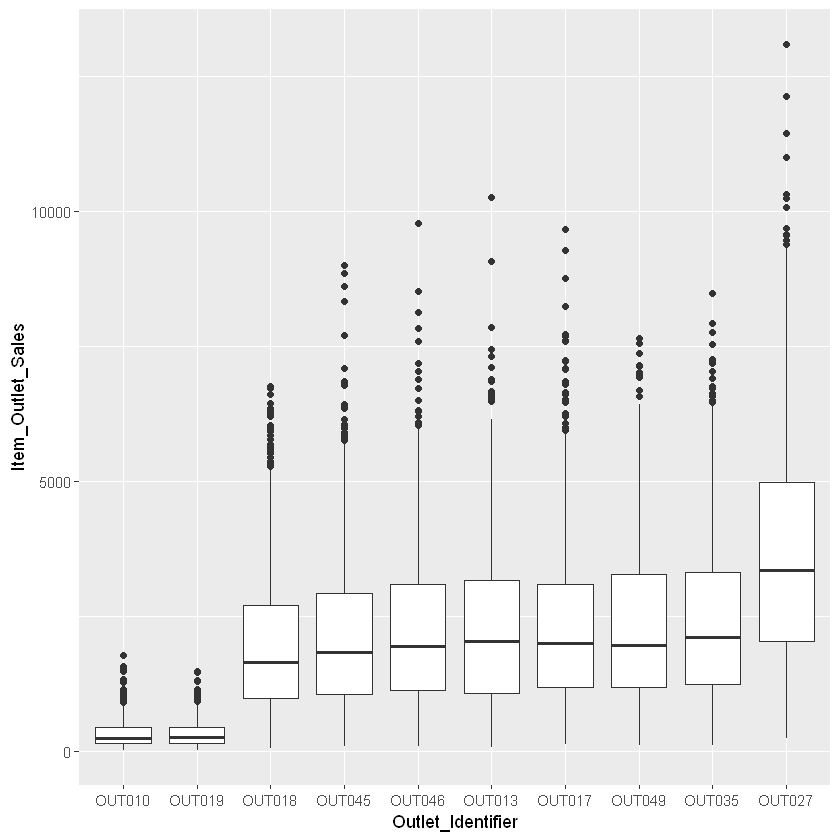

In [33]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Identifier

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x= reorder(Outlet_Identifier, Item_Outlet_Sales))
) +
geom_boxplot() + 
xlab("Outlet_Identifier") +
ylab("Item_Outlet_Sales")

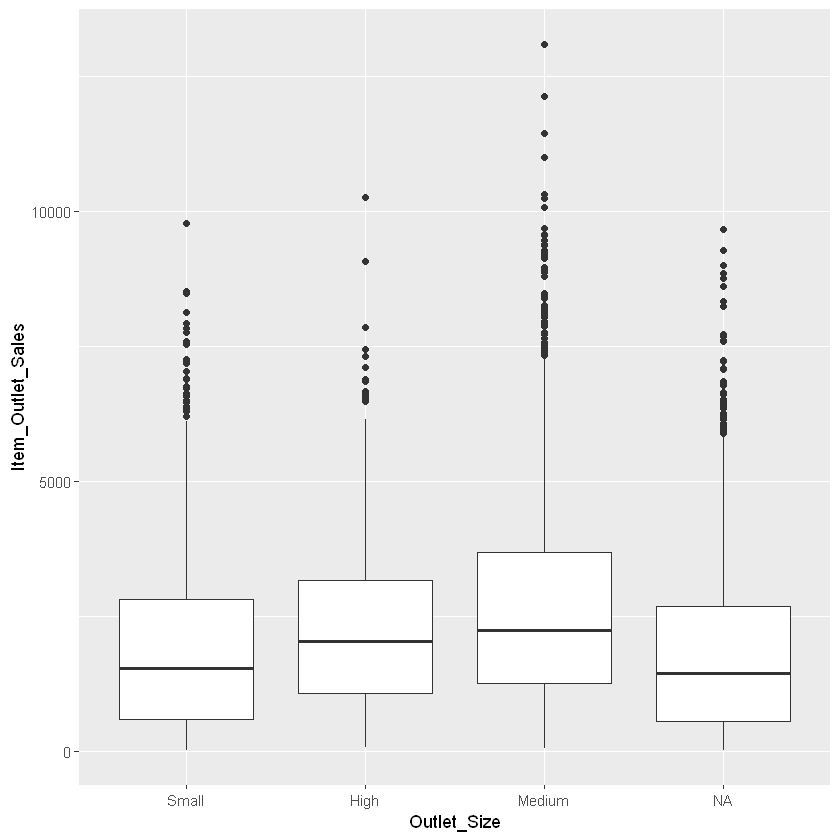

In [34]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Size

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x= reorder(Outlet_Size, Item_Outlet_Sales))
) +
geom_boxplot() + 
xlab("Outlet_Size") +
ylab("Item_Outlet_Sales")

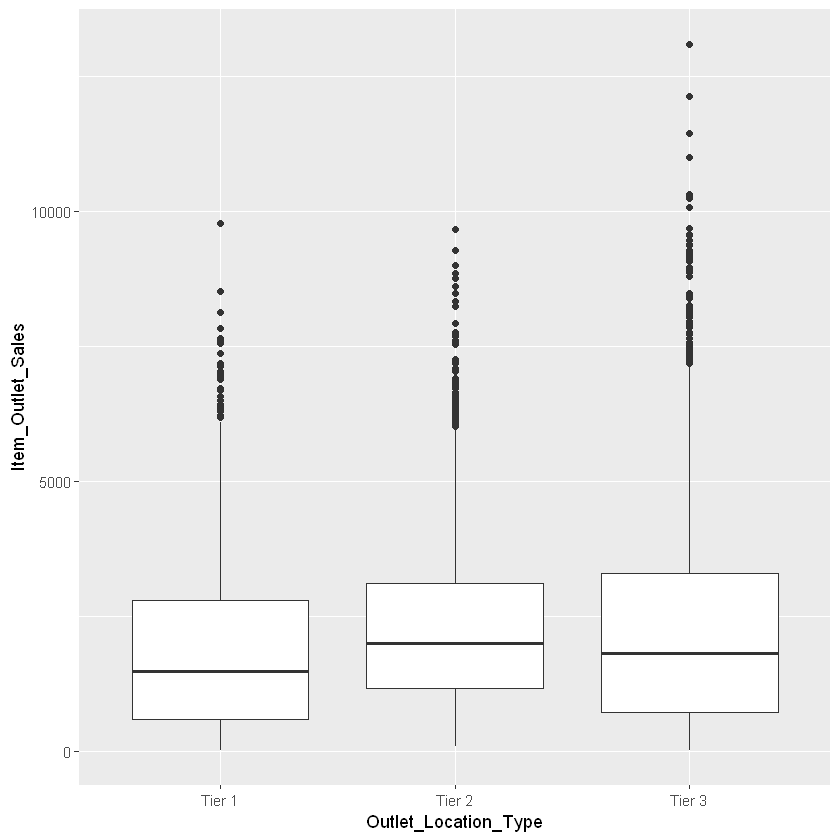

In [35]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Location_Type

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x=Outlet_Location_Type)
) +
geom_boxplot()

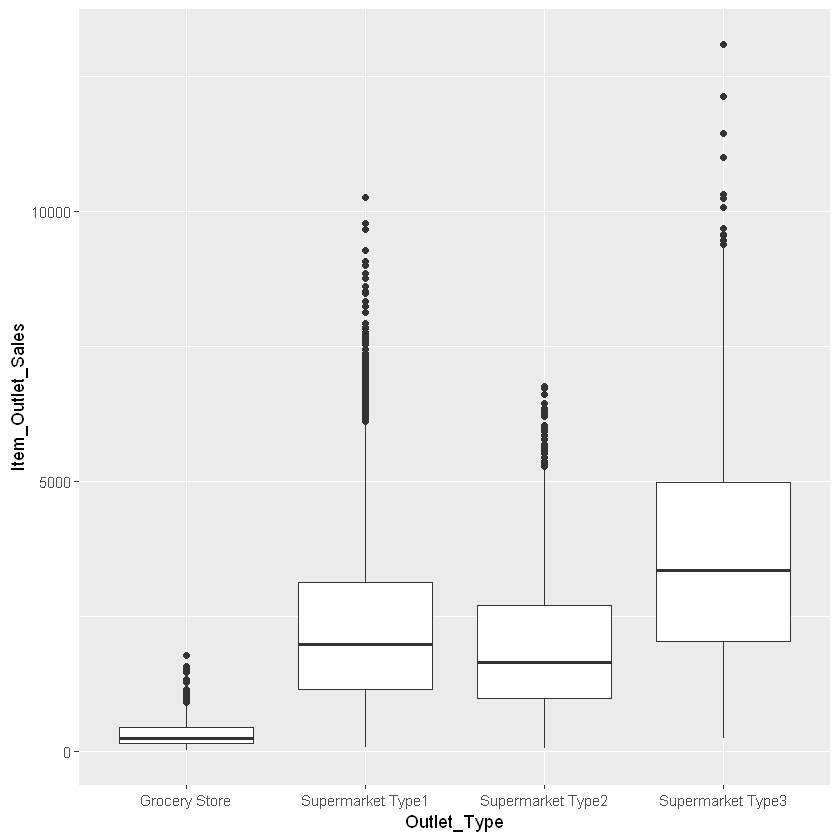

In [36]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Type

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x=Outlet_Type)
) +
geom_boxplot()

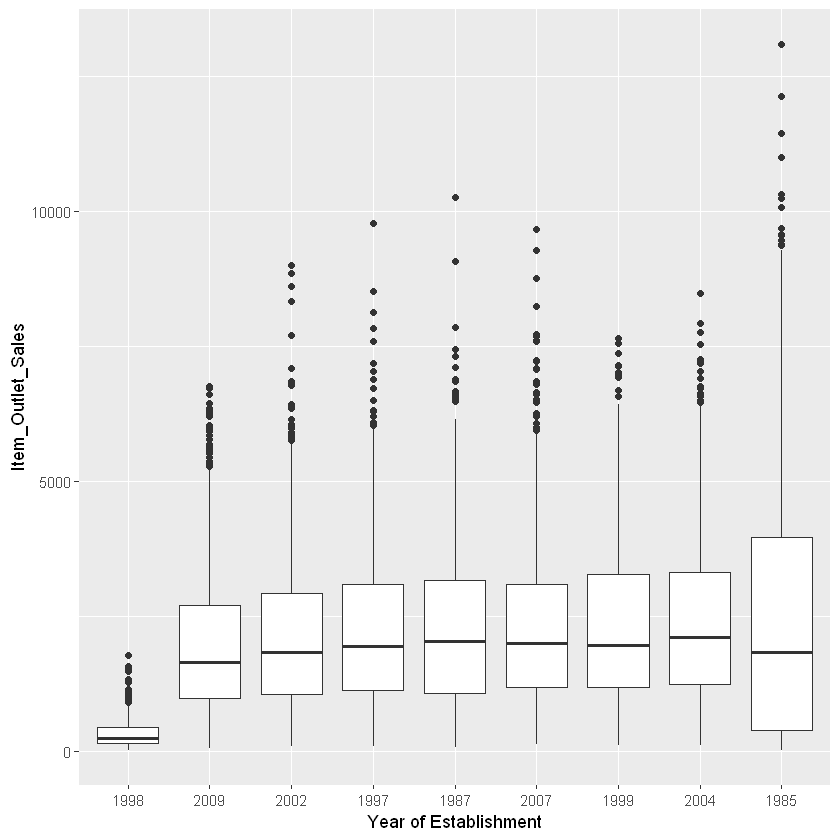

In [37]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Establishment_Year

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x= reorder(as.factor(Outlet_Establishment_Year), Item_Outlet_Sales))
) +
geom_boxplot() +
xlab("Year of Establishment")

# Correlation Analysis

In [38]:
cor(df[, c("Item_Outlet_Sales", "Item_Visibility", "Item_Weight", "Item_MRP")], use = "complete.obs")

,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_MRP
Item_Outlet_Sales,1.00000000,-0.085334041,0.01412274,0.620961316
Item_Visibility,-0.08533404,1.000000000,-0.01404773,-0.006061148
Item_Weight,0.01412274,-0.014047726,1.00000000,0.027141154
Item_MRP,0.62096132,-0.006061148,0.02714115,1.000000000


In [39]:
tidy(cor.test(as.numeric(as.factor(df$Outlet_Size)), df$Item_Outlet_Sales))

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
-0.1290756,-10.17533,3.975586e-24,6111,-0.1536474,-0.1043443,Pearson's product-moment correlation,two.sided


# Recipes for Transofrmation

# Modelling

In [44]:

# Normalizing the Dependent Variable
df <- df |> 
        mutate(Item_Outlet_Sales = ((Item_Outlet_Sales - mean(Item_Outlet_Sales) ) / sd(Item_Outlet_Sales)))


# Spit to train and test
set.seed(343)

df_split <- initial_split(df, strata = Item_Outlet_Sales)

df_train <- training(df_split)

df_test <- testing(df_split)

# Folds
df_folds <- vfold_cv(df_train, strata = Item_Outlet_Sales, repeats = 5)

# Recipe
# normalized_recipe <-recipe( Item_Outlet_Sales ~ . , data = df) |>
#                         # Fields not used in the predictive model
#                         update_role(Item_Weight, new_role = "weight_of_item") |>
#                         update_role(Outlet_Size, new_role = "size_of_outlet") |>
#                         # Normalizing all numeric variables except date
#                         step_normalize(all_predictors())




reg_recipe <-recipe( Item_Outlet_Sales ~ . , data = df) |>
                        # Fields not used in the predictive model
                        update_role(Item_Weight, new_role = "weight_of_item") |>
                        update_role(Outlet_Size, new_role = "size_of_outlet") |>
                        # Normalizing all numeric variables except date
                        step_normalize(all_numeric_predictors(), -Outlet_Establishment_Year) |>
                        # Pool infrequently occurring values into an "other" category
                        step_other(Item_Identifier, threshold = 9) |>
                        # Dummy all the categorical Predictors 
                        step_dummy(all_nominal_predictors())
                        

In [45]:
reg_recipe |>
    prep() |>
    bake(new_data = NULL) 

Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Identifier_DRN47,Item_Identifier_FDD38,Item_Identifier_FDF52,Item_Identifier_FDF56,⋯,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier.2,Outlet_Location_Type_Tier.3,Outlet_Type_Supermarket.Type1,Outlet_Type_Supermarket.Type2,Outlet_Type_Supermarket.Type3
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.300,-0.97067522,1.74735129,1999,Medium,0.910547575,0,0,0,0,⋯,0,0,0,0,1,0,0,1,0,0
5.920,-0.90805795,-1.48893590,2009,Medium,-1.018380606,0,0,0,0,⋯,0,0,0,0,0,0,1,0,1,0
17.500,-0.95686119,0.01003962,1999,Medium,-0.049234651,0,0,0,0,⋯,0,0,0,0,1,0,0,1,0,0
19.200,-1.28168256,0.66001082,1998,NA,-0.849053173,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
8.930,-1.28168256,-1.39913752,1987,High,-0.695331955,0,0,0,0,⋯,0,0,0,0,0,0,1,1,0,0
10.395,-1.28168256,-1.43864932,2009,Medium,-0.952054192,0,0,0,0,⋯,0,0,0,0,0,0,1,0,1,0
13.650,-1.03475180,-1.33815966,1987,High,-1.076903913,0,0,0,0,⋯,0,0,0,0,0,0,1,1,0,0
NA,1.18876777,-0.53360974,1985,Medium,1.079094697,0,0,0,0,⋯,1,0,0,0,0,0,1,0,0,1
16.200,-0.95827522,-0.70686688,2002,NA,-0.647342843,0,0,0,0,⋯,0,0,1,0,0,1,0,1,0,0


## Reg Models

In [57]:
library(rules)
library(baguette)


# Linear Regression Model
linear_reg_spec <- 
   linear_reg(penalty = tune(), mixture = tune()) %>% 
   set_engine("glmnet")


# Neural Network
nnet_spec <- 
   mlp(hidden_units = tune(), penalty = tune(), epochs = tune()) %>% 
   set_engine("nnet", MaxNWts = 2600) %>% 
   set_mode("regression")



mars_spec <- 
   mars(prod_degree = tune()) %>%  #<- use GCV to choose terms
   set_engine("earth") %>% 
   set_mode("regression")


# Radial SVM
svm_r_spec <- 
   svm_rbf(cost = tune(), rbf_sigma = tune()) %>% 
   set_engine("kernlab") %>% 
   set_mode("regression")


# Polynomial SVM
svm_p_spec <- 
   svm_poly(cost = tune(), degree = tune()) %>% 
   set_engine("kernlab") %>% 
   set_mode("regression")


# K-Nearest Neighbors SVM
knn_spec <- 
   nearest_neighbor(neighbors = tune(), dist_power = tune(), weight_func = tune()) %>% 
   set_engine("kknn") %>% 
   set_mode("regression")


# Classification and Regression Trees
cart_spec <- 
   decision_tree(cost_complexity = tune(), min_n = tune()) %>% 
   set_engine("rpart") %>% 
   set_mode("regression")


# Bag and CART Trees
bag_cart_spec <- 
   bag_tree() %>% 
   set_engine("rpart", times = 50L) %>% 
   set_mode("regression")


# Random Forest Regressor
rf_spec <- 
   rand_forest(mtry = tune(), min_n = tune(), trees = 1000) %>% 
   set_engine("ranger") %>% 
   set_mode("regression")


# XGBoost Regressor
xgb_spec <- 
   boost_tree(tree_depth = tune(), learn_rate = tune(), loss_reduction = tune(), 
              min_n = tune(), sample_size = tune(), trees = tune()) %>% 
   set_engine("xgboost") %>% 
   set_mode("regression")



In [58]:
# Neural Network Param

nnet_param <- 
   nnet_spec %>% 
   extract_parameter_set_dials() %>% 
   update(hidden_units = hidden_units(c(1, 27)))

## Creating the Workflow Set

In [61]:
normalized <- 
   workflow_set(
      preproc = list(normalized = normalized_recipe), 
      models = list(SVM_radial = svm_r_spec, SVM_poly = svm_p_spec, 
                    KNN = knn_spec, neural_network = nnet_spec, 
                    MARS = mars_spec, CART = cart_spec, CART_bagged = bag_cart_spec,
                    RF = rf_spec, boosting = xgb_spec)
   )
# normalized

In [62]:
# Adding the Neural Network Parameters

normalized <- 
   normalized %>% 
   option_add(param_info = nnet_param, id = "normalized_neural_network")

In [63]:
# Workflow Set for Non-Linear Models

# model_vars <- 
#    workflow_variables(outcomes = Item_Outlet_Sales, 
#                       predictors = everything())

# simple_pre_proc <- 
#    workflow_set(
#       preproc = list(simple_recipe = normalized_recipe), 
#       models = list(MARS = mars_spec, CART = cart_spec, CART_bagged = bag_cart_spec,
#                     RF = rf_spec, boosting = xgb_spec)
#    )

# simple_pre_proc

## Bind Workflows


In [46]:
all_workflows <-
    bind_rows(simple_pre_proc, normalized) |>
    # Simplifying Workflow ID
    mutate(wflow_id = gsub("(simple_)|(normalized_)", "", wflow_id))

In [64]:
normalized[, c("wflow_id", "option", "result")]

wflow_id,option,result
<chr>,<list>,<list>
normalized_SVM_radial,NULL,NULL
normalized_SVM_poly,NULL,NULL
normalized_KNN,NULL,NULL
normalized_neural_network,"hidden_units, penalty, epochs, hidden_units, penalty, epochs, model_spec, model_spec, model_spec, mlp, mlp, mlp, main, main, main, integer, 1, 27, TRUE, TRUE, # Hidden Units, double, -10, 0, TRUE, TRUE, log-10, function (x) , log(x, base), function (x) , base^x, function (x, n = n_default) , {, raw_rng <- suppressWarnings(range(x, na.rm = TRUE)), if (any(!is.finite(raw_rng))) {, return(numeric()), }, rng <- log(raw_rng, base = base), min <- floor(rng[1]), max <- ceiling(rng[2]), if (max == min) {, return(base^min), }, by <- floor((max - min)/n) + 1, breaks <- base^seq(min, max, by = by), relevant_breaks <- base^rng[1] <= breaks & breaks <= base^rng[2], if (sum(relevant_breaks) >= (n - 2)) {, return(breaks), }, while (by > 1) {, by <- by - 1, breaks <- base^seq(min, max, by = by), relevant_breaks <- base^rng[1] <= breaks & breaks <= , base^rng[2], if (sum(relevant_breaks) >= (n - 2)) {, return(breaks), }, }, log_sub_breaks(rng, n = n, base = base), }, function (b, limits, n) , {, b <- b[!is.na(b)], if (length(b) < 2) {, return(), }, bd <- diff(b)[1], if (!reverse) {, if (min(limits) < min(b)) , b <- c(b[1] - bd, b), if (max(limits) > max(b)) , b <- c(b, b[length(b)] + bd), }, else {, if (max(limits) > max(b)) , b <- c(b[1] - bd, b), if (min(limits) < min(b)) , b <- c(b, b[length(b)] + bd), }, seq_between <- function(a, b) {, seq(a, b, length.out = n + 1)[-(n + 1)], }, breaks <- unlist(Map(seq_between, b[-length(b)], b[-1])), breaks <- c(breaks, b[length(b)]), breaks, }, function (x) , {, if (!is.null(names(x))) {, return(names(x)), }, ret <- format(x, ..., trim = TRUE, justify = ""left""), ret[is.na(x)] <- NA, ret, }, 1e-100, Inf, Amount of Regularization, integer, 10, 1000, TRUE, TRUE, # Epochs",NULL
normalized_MARS,NULL,NULL
normalized_CART,NULL,NULL
normalized_CART_bagged,NULL,NULL
normalized_RF,NULL,NULL
normalized_boosting,NULL,NULL


## Tuning and Evaluating the Models

In [48]:
# # Using Grid Search

# grid_ctrl <-
#    control_grid(
#       save_pred = TRUE,
#       parallel_over = "everything",
#       save_workflow = TRUE
#    )


# grid_results <-
#    all_workflows %>%
#    workflow_map(
#       seed = 1503,
#       resamples = df_folds,
#       grid = 25,
#       control = grid_ctrl
#    )

In [49]:
# # View the results

# grid_results %>% 
#    rank_results() %>% 
#    filter(.metric == "rmse") %>% 
#    select(model, .config, rmse = mean, rank)

In [50]:
# autoplot(
#    grid_results,
#    rank_metric = "rmse",  # <- how to order models
#    metric = "rmse",       # <- which metric to visualize
#    select_best = TRUE     # <- one point per workflow
# ) +
#    geom_text(aes(y = mean - 1/2, label = wflow_id), angle = 90, hjust = 1) +
#    lims(y = c(3.5, 9.5)) +
#    theme(legend.position = "none")

## Efficiently Selecting Models

In [65]:
library(finetune)

race_ctrl <-
   control_race(
      save_pred = TRUE,
      parallel_over = "everything",
      save_workflow = TRUE
   )

race_results <-
   normalized %>%
   workflow_map(
      "tune_race_anova",
      seed = 1503,
      resamples = df_folds,
      grid = 25,
      control = race_ctrl
   )

In [ ]:
race_results[, c("wflow_id", "option", "result")]

In [ ]:
autoplot(
   race_results,
   rank_metric = "rmse",  
   metric = "rmse",       
   select_best = TRUE    
) +
   geom_text(aes(y = mean - 1/2, label = wflow_id), angle = 90, hjust = 1) +
   # lims(y = c(3.0, 9.5)) +
   theme(legend.position = "none")

# The Best Model

In [ ]:
best_results <- 
   race_results %>% 
   extract_workflow_set_result("boosting") %>% 
   select_best(metric = "rmse")


best_results

In [ ]:
boosting_test_results <- 
   race_results %>% 
   extract_workflow("boosting") %>% 
   finalize_workflow(best_results) %>% 
   last_fit(split = concrete_split)

In [ ]:
collect_metrics(boosting_test_results)

In [ ]:
boosting_test_results %>% 
   collect_predictions() %>% 
   ggplot(aes(x = Item_Outlet_Sales, y = .pred)) + 
   geom_abline(color = "gray50", lty = 2) + 
   geom_point(alpha = 0.5) + 
   coord_obs_pred() + 
   labs(x = "observed", y = "predicted")

## Building the Product

### What will the final product be?

The product will be a **report** that details the **influence** of *item characteristics* and *store profile* on item_sales.

In addition, the product will contain a *user-friendly application* that will provide business teams the ability to **predict/forecast** the sales of an item based on the item characteristics and store profile.

### Which Statistical Methods will be used and purpose of each?

I will be using the following statistical methods:

- **Descriptive Statistics**: This will reveal the properties of the given data.
- **Univariate and Bivariate analysis**: This will enable me to understand the distribution of the data and the relationship between the predictors and the response variable (item_sales_outlet).
- **Correlation Analysis**: This gives a level of association between all variables.
- **Modelling**: Here, I will build predictive models that best fit the data and evaluate each model using the **adjusted R-squared** metric.

### Which software?

For this analysis, I will be using R.

### Will these be adequate?

This analysis will be adequate to achieve the obectives of this analysis i.e.

1. Produce a report to guide strategic decision making.
2. Produce a user friendly application that forecasting tool to guide **tactical** and **operational** decisions 

### How will the analysis be validated?

The analysis will be validated in two ways:

1. We will document domain knowledge within the organization i.e. interview various tores to understand their beliefs of how **item characteristics** and **store profile** affects sales. After this we will test whether our model validates or contradicts their beliefs.
2. We will request for new data to evaluate/validate our model and check whether our model test performance (measured by RMSE/MAE or Adjusted-R-squared), is atleast better than our training performance (from our analysis). 

#### Does the product need to be tested?

The product will need to be tested to ensure high performance. 

## Delivering the Product


### Who is the audience?

The audience of this report are in 2 broad folds:
1. **Upper level management**: A comprehensive report detailing the influences/factors that affect item_outlet_sales will be submitted to this audience. This report will significantly guide strategic decision-making.
2. **Supply Chain and Sales teams**: A prediction/forecasting tool (or application) will be delivered to this audience to enable planning and sales forecast.

### How will the product be delivered?

The product will be produced via the ff approach:

1. **Exploring the data**: This will tie understanding the business to how the data reflects the business. This will include missing data analysis, correlation analysis, scatterplots and other approaches to understand the data.
2. **Plan the analysis**: Based on the results of the data exploration, I will plan how to deal with missing data, will predictors need to be transformed and prepare the data to be modeled.
3. **Modelling and Evaluation**: Build the predctive models and evaluate the performance of these models.
4. **Deployment**: Producing the report and building the application.

### How will the product be used?

The product will be used in the following ways:

1. **Report**: This will be used to enable strategic decision-making. For instance, this will inform decisions on what outlet locations and types influence item sales.
2. **Application**: This tool will be used by mid-level staff for tactical and operational decision making. For example to forecast sales for a given product in a given store.

### How much detail to include?

1. **Report**: This should be high-level information and not include so much detail on modelling approaches and others.
2. **Application**: This should contain enough detail for the application to be used to predict/forecast sales.